In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from copy import copy
from scipy import stats
from sklearn.metrics import precision_recall_curve, recall_score, precision_score, f1_score

In [2]:
df = pd.read_csv('nba2k20-full.csv')
df.head()

,full_name,rating,jersey,team,position,b_day,height,weight,salary,country,draft_year,draft_round,draft_peak,college
0,LeBron James,97,#23,Los Angeles Lakers,F,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858,USA,2003,1,1,NaN
1,Kawhi Leonard,97,#2,Los Angeles Clippers,F,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000,USA,2011,1,15,San Diego State
2,Giannis Antetokounmpo,96,#34,Milwaukee Bucks,F-G,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697,Greece,2013,1,15,NaN
3,Kevin Durant,96,#7,Brooklyn Nets,F,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000,USA,2007,1,2,Texas
4,James Harden,96,#13,Houston Rockets,G,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000,USA,2009,1,3,Arizona State


In [3]:
df.drop(columns=['full_name', 'jersey', 'team', 'position', 'country', 'draft_year', 'draft_round', 'draft_peak', 'college'], inplace=True)
df.head()

,rating,b_day,height,weight,salary
0,97,12/30/84,6-9 / 2.06,250 lbs. / 113.4 kg.,$37436858
1,97,06/29/91,6-7 / 2.01,225 lbs. / 102.1 kg.,$32742000
2,96,12/06/94,6-11 / 2.11,242 lbs. / 109.8 kg.,$25842697
3,96,09/29/88,6-10 / 2.08,230 lbs. / 104.3 kg.,$37199000
4,96,08/26/89,6-5 / 1.96,220 lbs. / 99.8 kg.,$38199000


In [4]:
df['b_day'] = df['b_day'].transform(lambda x: int(x.split('/')[2]))
df['height'] = df['height'].transform(lambda x: float(x.split('/')[1]))
df['weight'] = df['weight'].transform(lambda x: int(x.split('/')[0][:3]))
df['salary'] = df['salary'].transform(lambda x: int(x[1:]))
df.head()

,rating,b_day,height,weight,salary
0,97,84,2.06,250,37436858
1,97,91,2.01,225,32742000
2,96,94,2.11,242,25842697
3,96,88,2.08,230,37199000
4,96,89,1.96,220,38199000


<AxesSubplot:>

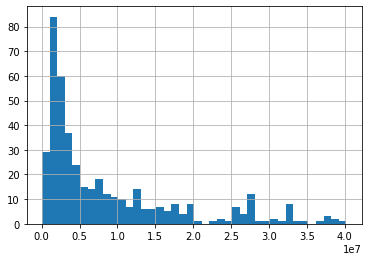

In [5]:
df['salary'].hist(bins=40)

In [6]:
df['salary'] = df['salary'].transform(lambda x: min(2, x//10000000))
df.head()

,rating,b_day,height,weight,salary
0,97,84,2.06,250,2
1,97,91,2.01,225,2
2,96,94,2.11,242,2
3,96,88,2.08,230,2
4,96,89,1.96,220,2


<AxesSubplot:>

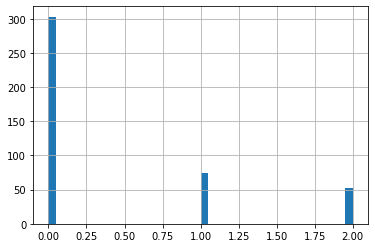

In [7]:
df['salary'].hist(bins=40)

<AxesSubplot:>

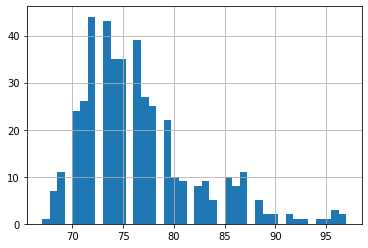

In [8]:
df['rating'].hist(bins=40)

<AxesSubplot:>

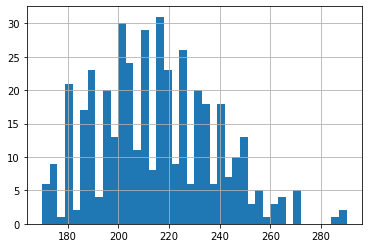

In [9]:
df['weight'].hist(bins=40)

<AxesSubplot:>

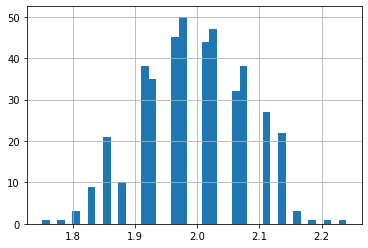

In [10]:
df['height'].hist(bins=40)

<AxesSubplot:>

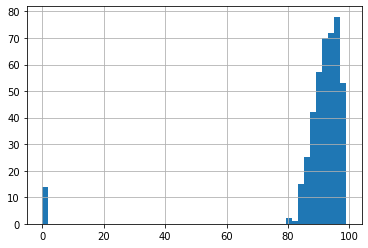

In [11]:
df['b_day'].hist(bins=50)

In [12]:
df[df['b_day'].between(0, 70)]

,rating,b_day,height,weight,salary
72,81,0,1.98,284,0
112,78,0,1.98,202,0
137,77,0,1.85,175,0
202,76,0,1.93,185,0
271,74,0,2.11,220,0
310,73,0,1.96,195,0
312,73,0,2.03,209,0
315,73,0,1.96,220,0
347,72,0,1.93,218,0
357,72,0,2.08,209,0


In [13]:
df['b_day'] = df['b_day'].transform(lambda x: x + 100 if x < 70 else x)
df.head()

,rating,b_day,height,weight,salary
0,97,84,2.06,250,2
1,97,91,2.01,225,2
2,96,94,2.11,242,2
3,96,88,2.08,230,2
4,96,89,1.96,220,2


<AxesSubplot:>

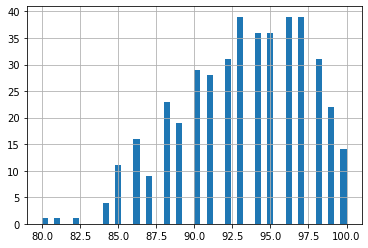

In [14]:
df['b_day'].hist(bins=50)

In [15]:
df.head()

,rating,b_day,height,weight,salary
0,97,84,2.06,250,2
1,97,91,2.01,225,2
2,96,94,2.11,242,2
3,96,88,2.08,230,2
4,96,89,1.96,220,2


In [16]:
x = df.drop('salary', axis=1).values.tolist()
y = df['salary'].values.tolist()
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, stratify=y, test_size=0.3)

In [17]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(x_train, y_train)

# Получим значение метки для тестового набора
knn_pred = knn_clf.predict(x_test)

# Посчитаем метрику качества
knn_acc_score = accuracy_score(y_test, knn_pred)

print("Accuracy_score: " + str(knn_acc_score))

Accuracy_score: 0.7751937984496124


In [18]:
df.head()

,rating,b_day,height,weight,salary
0,97,84,2.06,250,2
1,97,91,2.01,225,2
2,96,94,2.11,242,2
3,96,88,2.08,230,2
4,96,89,1.96,220,2


In [19]:
stats.normaltest(df['height'])

NormaltestResult(statistic=4.846177468074185, pvalue=0.08864738596500196)

In [20]:
stats.normaltest(df['weight'])

NormaltestResult(statistic=10.894841418040478, pvalue=0.004307400414085642)

In [21]:
stats.normaltest(df['rating'])

NormaltestResult(statistic=85.46390370634055, pvalue=2.7653436520763265e-19)

In [22]:
stats.normaltest(df['b_day'])

NormaltestResult(statistic=18.70287282528899, pvalue=8.684059054090126e-05)